In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

In [4]:
income = pd.read_csv("Adult_Census_Income.csv")
income.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
income.isnull().sum()
# data is clean

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [6]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# remove the ? and white spaces

income.replace(regex=r'\?', value=np.nan, inplace=True)
income.dropna(axis=0, inplace=True)
income.replace(regex=r'^\s', value='', inplace=True)

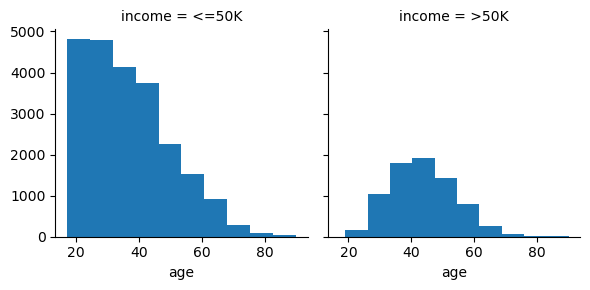

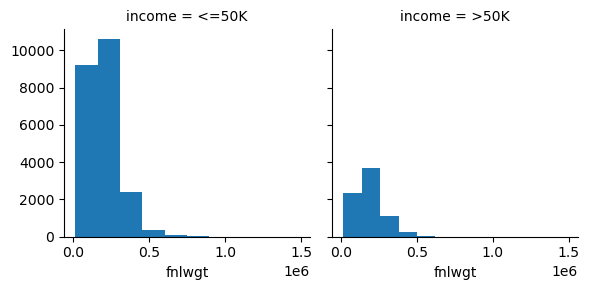

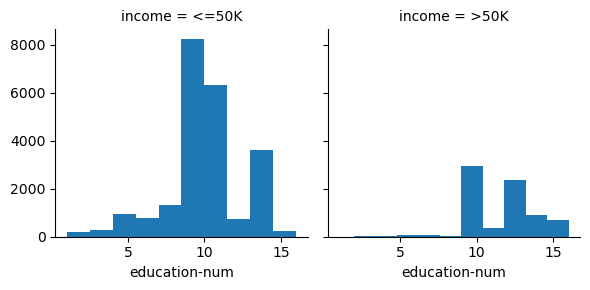

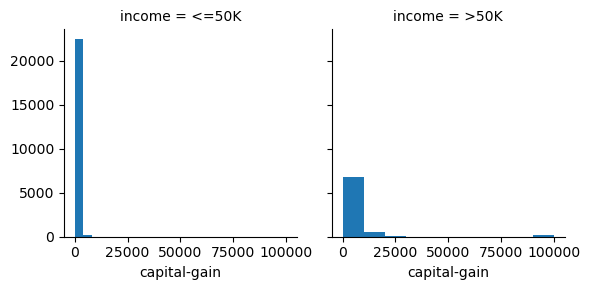

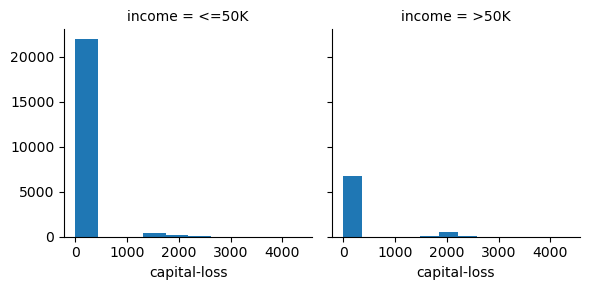

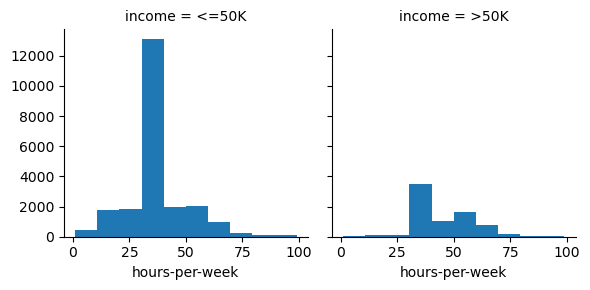

In [8]:
# produce conditional histograms

def income_cond_hists(income, plot_cols, grid_cols):
    for col in plot_cols:
        g = sns.FacetGrid(income, col= grid_cols, margin_titles=True)
        g.map(plt.hist, col)
        plt.show()
        
income_cond_hists(income, income.select_dtypes(include=[np.number]).columns, "income")       

In [9]:
# build an ANN in order to predict a person's income being over 50k or not

income['income'] = (income['income'].str.replace(' ', '')=='>50K').astype(int)
print(income.head(10))

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   
5   37           Private  284582    Masters             14   
6   49           Private  160187        9th              5   
7   52  Self-emp-not-inc  209642    HS-grad              9   
8   31           Private   45781    Masters             14   
9   42           Private  159449  Bachelors             13   

          marital-status         occupation   relationship   race     sex  \
0          Never-married       Adm-clerical  Not-in-family  White    Male   
1     Married-civ-spouse    Exec-managerial        Husband  White    Male   
2               Divorced  Handlers-cleaners  Not-in-family  White    Male   
3     Mar

In [10]:
df = income.select_dtypes(include=[np.number])
df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0
...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0
32557,40,154374,9,0,0,40,1
32558,58,151910,9,0,0,40,0
32559,22,201490,9,0,0,20,0


In [13]:
X = df.iloc[:,0:6].apply(pd.to_numeric, errors="coerce")
y = df.iloc[:,6].apply(pd.to_numeric, errors="coerce")

X = X.to_numpy().astype('float32')
y = y.to_numpy().astype('float32')

model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10, verbose=0)

# make class predictions with the model
predictions = model.predict(X)

# evaluate model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

# summarize the first 5 cases
for i in range(5):
	print('predicted %d (actual %d)' % (round(predictions[i][0]), y[i]))

943/943 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step
943/943 ━━━━━━━━━━━━━━━━━━━━ 0s 164us/step - accuracy: 0.7523 - loss: 0.5598
Accuracy: 75.11
predicted 0 (actual 0)
predicted 0 (actual 0)
predicted 0 (actual 0)
predicted 0 (actual 0)
predicted 0 (actual 0)
